In [27]:
import os
import sys
import talib as ta
syspath = os.path.split(os.path.abspath("."))[0]
sys.path.append(syspath)
import univ3api.simulation as sim
import univ3api.utils as utils
import importlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# run if simulation file is updated
importlib.reload(sim)

HOST = "mongodb://172.16.11.81:27017/ETHDATA"
source = sim.DataUtilMongoDB(HOST)

from datetime import datetime
import time
d1 = datetime(2021,5, 10, 9)
d2 = datetime(2021,9, 1,9)
t1 = int(time.mktime(d1.timetuple()))
t2 = int(time.mktime(d2.timetuple()))

# print(d1.timetuple())
# print(time.mktime(d1.timetuple()))
# print(int(time.mktime(d1.timetuple())))

# swapdata = source.swap_by_time("SWAP_WETH_USDT_3000", t1, t2)
swapdata = source.swap_by_time("SWAP_USDC_WETH_3000", t1, t2)
swapdata.tail()
pricedata = swapdata[["timestamp", "sqrtPriceX96"]]
# pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(18, 6).x96_to_price)
pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(6, 18).x96_to_price)
pricedata.tail()

,timestamp,sqrtPriceX96,price
120400,1630457280,1355527382349696291973070296916222,0.000293
120401,1630457316,1355633495651790988012240522812889,0.000293
120402,1630457355,1356496723249880871370773228843790,0.000293
120403,1630457391,1356664209375015011561300805592324,0.000293
120404,1630457391,1357380036677709158041273101685800,0.000294


In [28]:
priceDf = pricedata
priceDf['datetime'] = list(map(lambda d: datetime.fromtimestamp(d), priceDf['timestamp'] ))
priceDt = priceDf.set_index('datetime')
priceDay = priceDt.resample('D').last()
priceDay['MA50'] = priceDay['price'].rolling(50).mean()
priceDay['Trend'] = priceDay['price']>=priceDay['MA50']
priceDay.index = list(map(lambda d: d.date(), priceDay.index))
trendDict = dict(priceDay['Trend'])
priceDt['date'] = list(map(lambda d: d.date(), priceDt.index))
trendList = []
for i, v in priceDt.iterrows():
    trendList.append(trendDict[v['date']])
print(f'len of trendList:{len(trendList)}')
priceDt['trend'] = trendList

len of trendList:120405


In [29]:
priceDt

,timestamp,sqrtPriceX96,price,date,trend
datetime,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,2021-05-10,False
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,2021-05-10,False
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,2021-05-10,False
...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,2021-09-01,False
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,2021-09-01,False
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,2021-09-01,False


In [30]:
pricedata_res = pd.read_csv('../data/pricedata_res.csv',index_col=0)
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile75,CloseLowerMA,VolHigherQuantile50TwoSigma
datetime,,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000216,0.0,1.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000049,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000050,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000051,0.0,1.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000154,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000057,1.0,1.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000193,1.0,1.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000092,1.0,1.0,0.0,0.0


In [31]:
pricedata_res['price'] = priceDt['price']
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile75,CloseLowerMA,VolHigherQuantile50TwoSigma
datetime,,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,1.0,1.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,1.0,1.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,1.0,1.0,0.0,0.0


In [32]:
init_price = pricedata_res["price"][0]

decimal0 = 6
decimal1 = 18

init_amount0 = 1000000*1e6
init_amount1 = 0

In [33]:
import usdceth_vol_strategy
importlib.reload(utils)
importlib.reload(sim)
importlib.reload(usdceth_vol_strategy)
strategy = usdceth_vol_strategy.HoldStrategy(init_amount0, init_amount1, decimal0, decimal1, sim.PoolFee.low, True)
strategy.init(swapdata.iloc[0].to_dict())

# strategy.run(swapdata, priceDt)
strategy.run(swapdata, pricedata_res)

report = strategy.report()

***********************************【创建Long Vol池子】【第1次建池】***********************************
转换后钱包中余额 amount0:  399700000000.0 amount1:  153401599031946575872
price:  0.0002559611947100053
$$$$$$$【Upper Price】: 0.00033006024065851007
$$$$$$$【Lower Price】: 0.00018186214876150054
######【L】:53918237685642440【USDC】:399700000000【ETH】:137576274175177474048
将要投入池子的数量 amount_t0: 399700000000 amount_t1: 137576274175177375744
【RealWorldTime】:2021-05-10 09:17:52, Timestamp: 1620609472, Blocknumber: 12403600
Mint position： Position(L=53917490842266688, tick=[190140, 196140], range=[3035.1064, 5530.1585])
【Mint amount】: token0=399687.018601, token1=137.5762741751774
Wallet amount: token0=12.981399, token1=15.8253248567692
******************************************【撤销池子】【超边撤池】******************************************
Price(0.0003303659555732353) out of range(0.00018186214876150054, 0.00033006024065851007)
【RealWorldTime】:2021-05-19 12:20:11,Timestamp: 1621398011, Blocknumber: 12462646
Decreased posi

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-10 09:17:52,399687.018601,0.000000,0.000000,0.000000,137.576,0.000000,0.000000,0.000000
1,2021-05-10 09:17:52,399687.018601,0.000000,0.000000,0.000000,137.576,0.000000,0.000000,0.000000
2,2021-05-10 09:23:50,399836.950329,0.074965,0.074965,0.074965,137.538,0.000000,0.000000,0.000000
3,2021-05-10 09:24:49,399840.146698,0.001598,0.076563,0.076563,137.537,0.000000,0.000000,0.000000
4,2021-05-10 09:24:49,399841.374104,0.000613,0.077176,0.077176,137.537,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
11323,2021-05-19 12:18:22,2193.357367,0.000000,4647.747765,4647.747765,252.924,0.000532,1.312988,1.312988
11324,2021-05-19 12:18:22,0.000000,0.000000,4647.747765,4647.747765,253.646,0.000361,1.313349,1.313349
11325,2021-05-19 12:18:29,0.000000,0.000000,4647.747765,4647.747765,253.646,0.000000,1.313349,1.313349
11326,2021-05-19 12:20:11,1775.994453,0.887997,4648.635762,4648.635762,253.062,0.000000,1.313349,1.313349


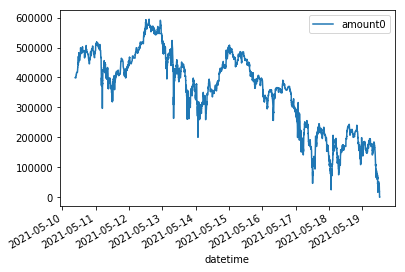

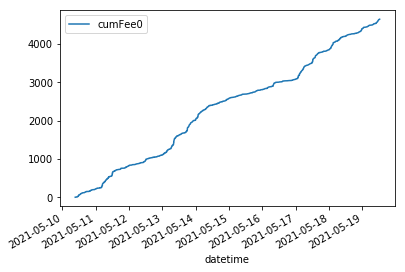

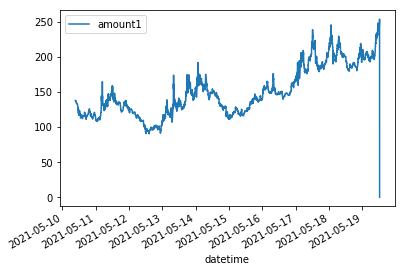

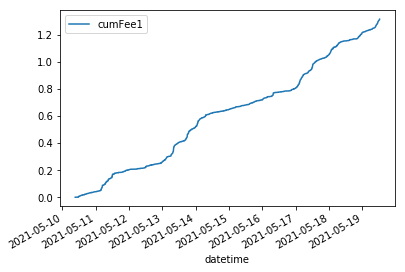

In [34]:
report.positions[1].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-06-03 15:59:39,313566.526892,0.000000,0.000000,0.000000,147.307,0.000000,0.000000,0.000000
1,2021-06-03 16:01:35,313007.250808,0.000000,0.000000,0.000000,147.505,0.000099,0.000099,0.000099
2,2021-06-03 16:14:09,313408.143825,0.200446,0.200446,0.200446,147.363,0.000000,0.000099,0.000099
3,2021-06-03 16:14:09,313826.357967,0.209107,0.409553,0.409553,147.215,0.000000,0.000099,0.000099
4,2021-06-03 16:14:38,314100.188731,0.136915,0.546468,0.546468,147.118,0.000000,0.000099,0.000099
...,...,...,...,...,...,...,...,...,...
15542,2021-06-19 02:21:54,2026.943373,0.000000,1506.329008,1506.329008,272.312,0.000025,0.657821,0.657821
15543,2021-06-19 02:21:54,1932.619541,0.000000,1506.329008,1506.329008,272.355,0.000021,0.657843,0.657843
15544,2021-06-19 02:22:16,1656.713385,0.000000,1506.329008,1506.329008,272.48,0.000063,0.657906,0.657906
15545,2021-06-19 02:22:16,1404.849705,0.000000,1506.329008,1506.329008,272.595,0.000057,0.657963,0.657963


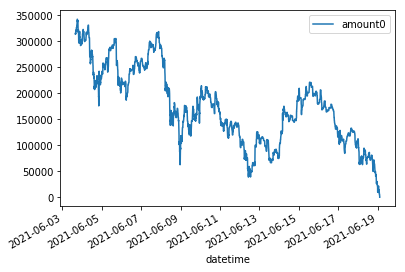

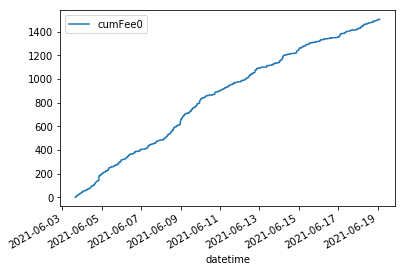

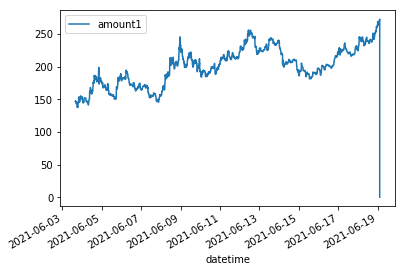

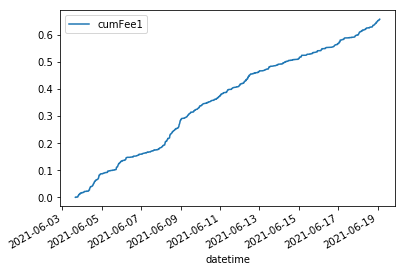

In [35]:
report.positions[2].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-06-19 02:22:22,255921.528114,0.000000,0.000000,0.000000,150.964,0.000000,0.000000,0.000000
1,2021-06-19 02:22:32,256007.886710,0.043179,0.043179,0.043179,150.925,0.000000,0.000000,0.000000
2,2021-06-19 02:22:32,256244.809789,0.118461,0.161640,0.161640,150.816,0.000000,0.000000,0.000000
3,2021-06-19 02:22:36,256524.135956,0.139663,0.301303,0.301303,150.688,0.000000,0.000000,0.000000
4,2021-06-19 02:22:36,257081.323168,0.278593,0.579896,0.579896,150.433,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
5674,2021-06-22 20:39:52,1263.488329,0.000000,906.396794,906.396794,279.766,0.001672,0.515582,0.515582
5675,2021-06-22 20:40:10,71.435626,0.000000,906.396794,906.396794,280.431,0.000333,0.515915,0.515915
5676,2021-06-22 20:40:18,986.512132,0.457538,906.854332,906.854332,279.92,0.000000,0.515915,0.515915
5677,2021-06-22 20:40:18,868.073731,0.000000,906.854332,906.854332,279.986,0.000033,0.515948,0.515948


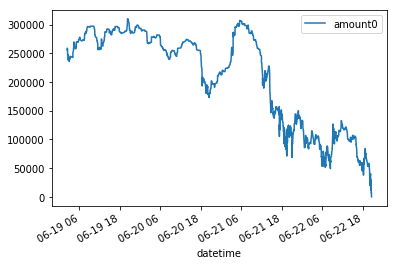

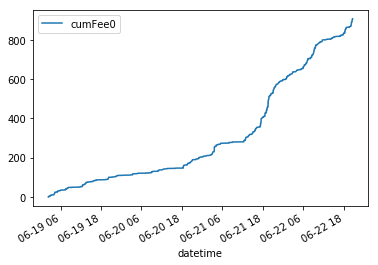

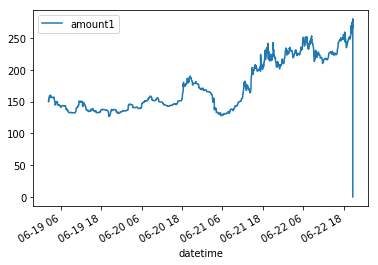

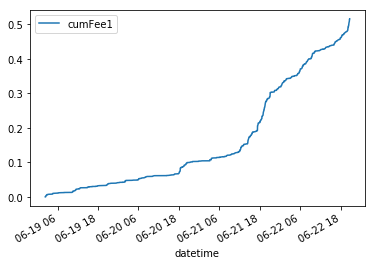

In [36]:
report.positions[3].get_balance(plain=True, draw_plot=True)

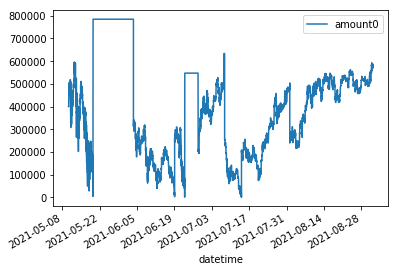

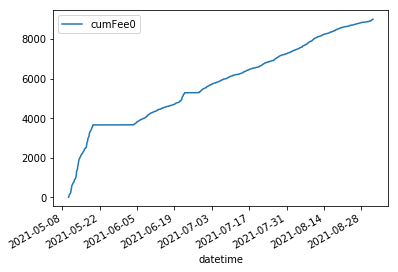

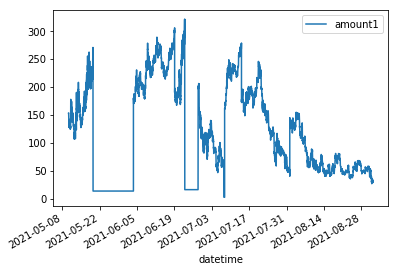

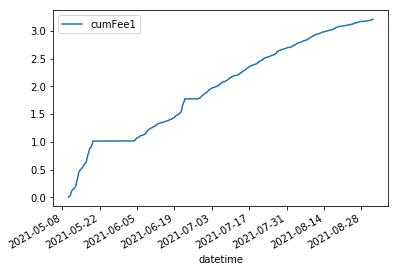

In [37]:
total_balance = report.total_balance(draw_plot=True, plain=True)

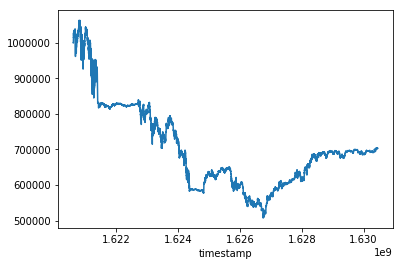

In [38]:
price = pricedata.drop_duplicates("timestamp").set_index("timestamp")["price"]
price
usdc_balance = total_balance.set_index("timestamp")[["amount0", "cumFee0"]].sum(axis=1)
eth_balance = total_balance.set_index("timestamp")[["amount1", "cumFee1"]].sum(axis=1) / price
eth_balance+usdc_balance
# eth_balance.plot()
# usdt_balance.plot()
tb_Timing = (eth_balance+usdc_balance)
tb_Timing.plot()

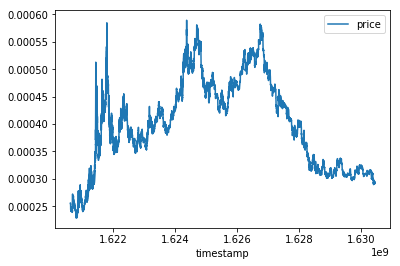

In [39]:
assets_value = pricedata.set_index("timestamp")["price"] * (total_balance["amount1"] / 10**decimal1) + total_balance["amount0"] / 10**decimal0
# assets_value.plot()
pricedata.set_index("timestamp")[["price"]].plot()